In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Today's data

400 fotos of human faces. Each face is a 2d array [64x64] of pixel brightness.

In [2]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Sirius\scikit_learn_data


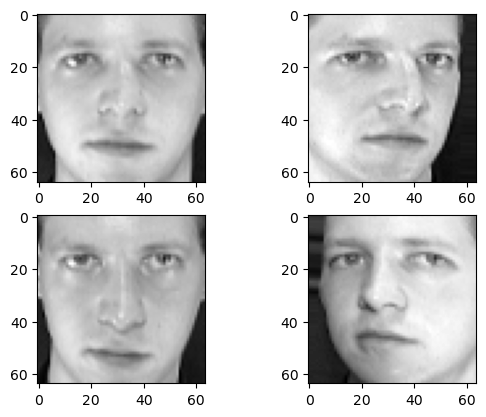

In [9]:
# this code showcases matplotlib subplots. The syntax is: plt.subplot(height, width, index_starting_from_1)
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# Face reconstruction problem

Let's solve the face reconstruction problem: given left halves of facex __(X)__, our algorithm shall predict the right half __(y)__. Our first step is to slice the photos into X and y using slices.

__Slices in numpy:__
* In regular python, slice looks roughly like this: `a[2:5]` _(select elements from 2 to 5)_
* Numpy allows you to slice N-dimensional arrays along each dimension: [image_index, height, width]
  * `data[:10]` - Select first 10 images
  * `data[:, :10]` - For all images, select a horizontal stripe 10 pixels high at the top of the image
  * `data[10:20, :, -25:-15]` - Take images [10, 11, ..., 19], for each image select a _vetrical stripe_ of width 10 pixels, 15 pixels away from the _right_ side.

__Your task:__

Let's use slices to select all __left image halves as X__ and all __right halves as y__.

In [14]:
data.shape

(400, 64, 64)

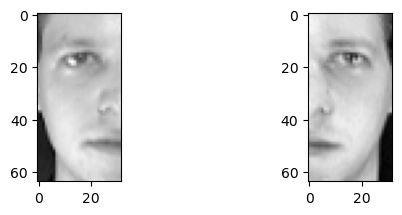

In [27]:
# select left half of each face as X, right half as Y
X = data[:, :, :32]
Y = data[:, :, 32:]

plt.subplot(2,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(Y[0],cmap='gray')

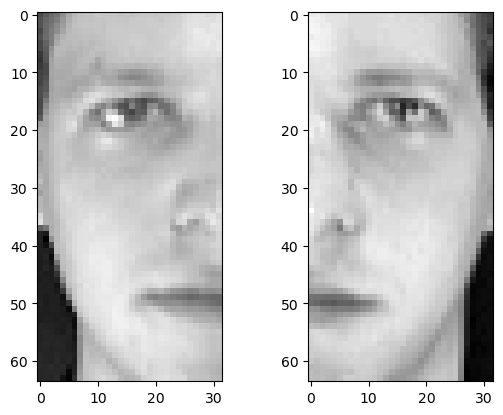

In [28]:
# If you did everything right, you're gonna see left half-image and right half-image drawn separately in natural order
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')

assert X.shape == y.shape == (len(data), 64, 32), "Please slice exactly the left half-face to X and right half-face to Y"

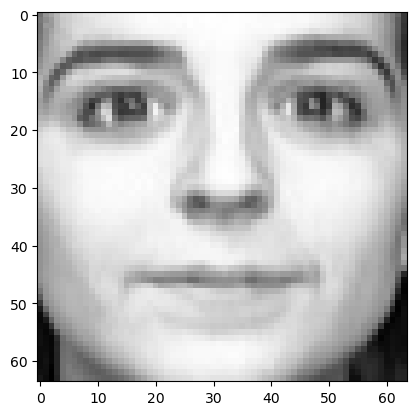

In [29]:
def glue(left_half,right_half):
    # merge photos back together
    left_half = left_half.reshape([-1, 64, 32])
    right_half = right_half.reshape([-1, 64, 32])
    return np.concatenate([left_half, right_half], axis=-1)


# if you did everything right, you're gonna see a valid face
plt.imshow(glue(X, y)[99], cmap='gray')

# Linear regression

Split __X__ and __y__ randomly into train and test. Use 95% of the objects for train and the rest 5% for test.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
                train_test_split(X.reshape(X.shape[0], -1),
                                 y.reshape(X.shape[0], -1),
                                 test_size=0.05, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(380, 2048) (380, 2048)
(20, 2048) (20, 2048)


Learn Linear Regression on train data. Use `LinearRegression` from `sklearn.linear_model`

In [39]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Compute measure mean squared error on train and test samples. Use `mean_squared_error` from `sklearn.metrics`

In [48]:
from sklearn.metrics import mean_squared_error 


mse_train = mean_squared_error(y_train, linear.predict(X_train))
mse_test = mean_squared_error(y_test, linear.predict(X_test))


print("Train MSE:", mse_train )
print("Test MSE:", mse_test)

Train MSE: 7.484913e-13
Test MSE: 0.012688993


## Why train error is much smaller than test?

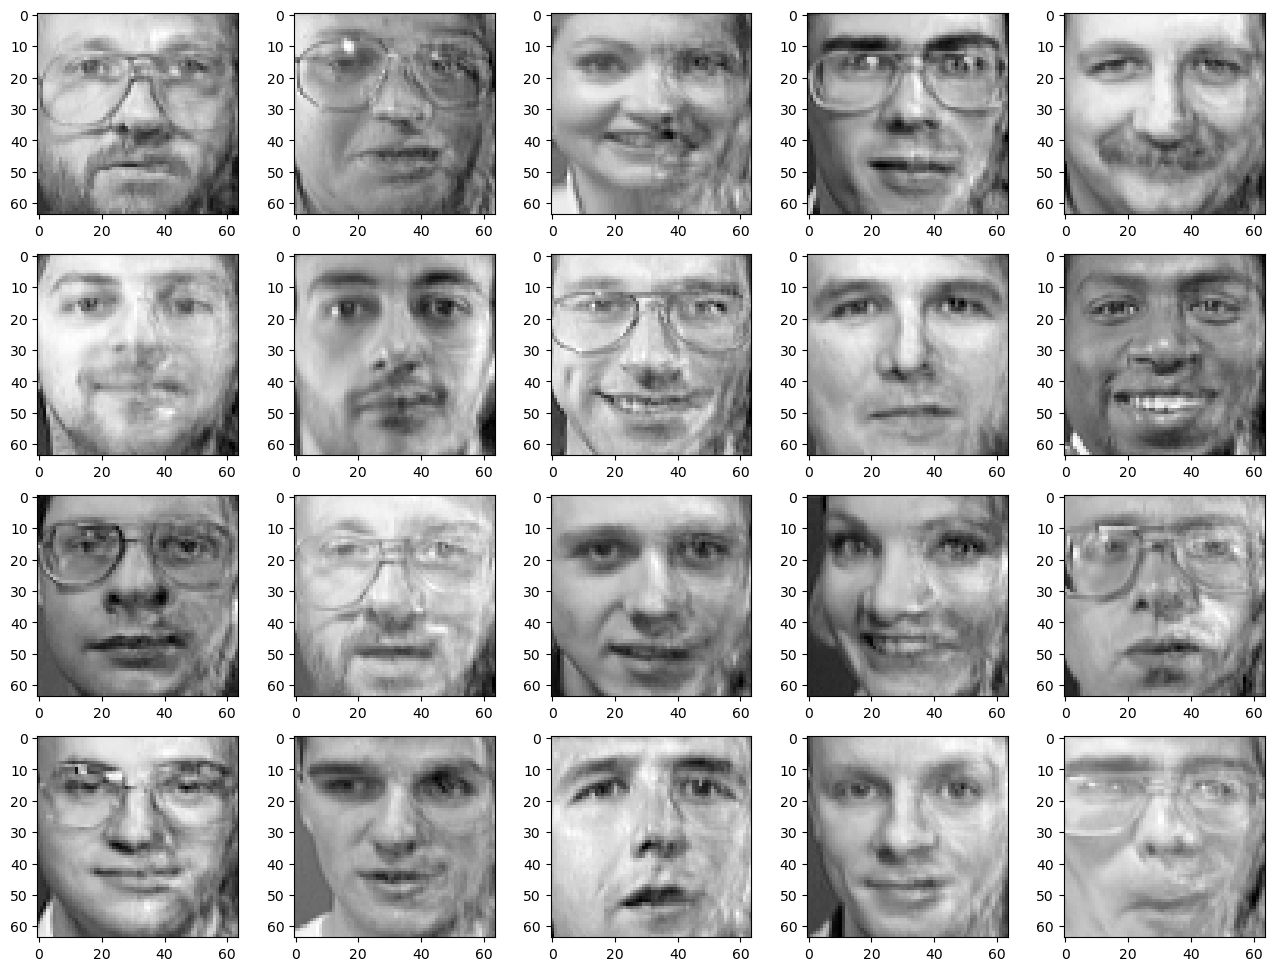

In [50]:
# Train predictions
pics = glue(X_test, linear.predict(X_test)) # reconstruct and glue together X and predicted Y for the train dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

### Regularisation

There are  many linear models in sklearn package, and all of them can be found [here](https://scikit-learn.org/stable/modules/linear_model.html). We will focus on 3 of them: Ridge regression, Lasso and ElasticNet.
Idea of all of them is very simple: add some penalty to the objective loss function to prevent overfitting.

# Ridge regression
RidgeRegression is just a LinearRegression, with l2 regularization - penalized for $ \alpha \cdot \sum _i w_i^2$

Let's train such a model with alpha=0.5

In [60]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)

ridge.fit(X_train, y_train)

# <YOUR CODE: fit the model on training set>

Ridge(alpha=0.5)

In [62]:

mse_train = mean_squared_error(y_train, ridge.predict(X_train))
mse_test = mean_squared_error(y_test, ridge.predict(X_test))


print("Train MSE:", mse_train )
print("Test MSE:", mse_test)

Train MSE: 0.00043098576
Test MSE: 0.0099508


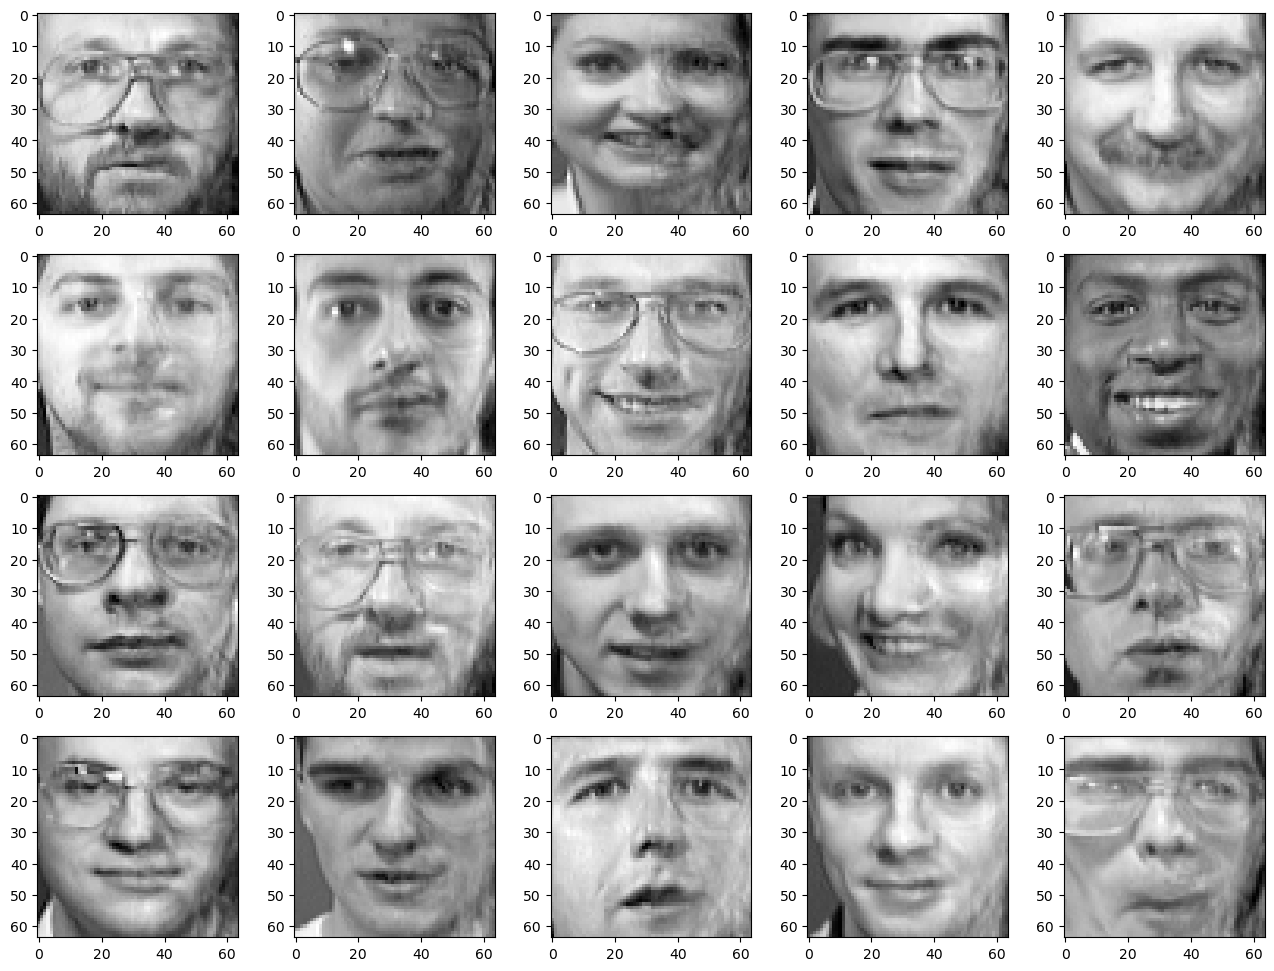

In [65]:
# Test predictions
pics = glue(X_test, ridge.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

# Lasso regression

Try to use `Lasso` Regression. Try to choose reasonable `alpha`

In [66]:
from sklearn.linear_model import Lasso

In [85]:
lasso = Lasso(alpha=0.001)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [86]:
mse_train = mean_squared_error(y_train, lasso.predict(X_train))
mse_test = mean_squared_error(y_test, lasso.predict(X_test))


print("Train MSE:", mse_train )
print("Test MSE:", mse_test)

Train MSE: 0.0064405324
Test MSE: 0.008909687


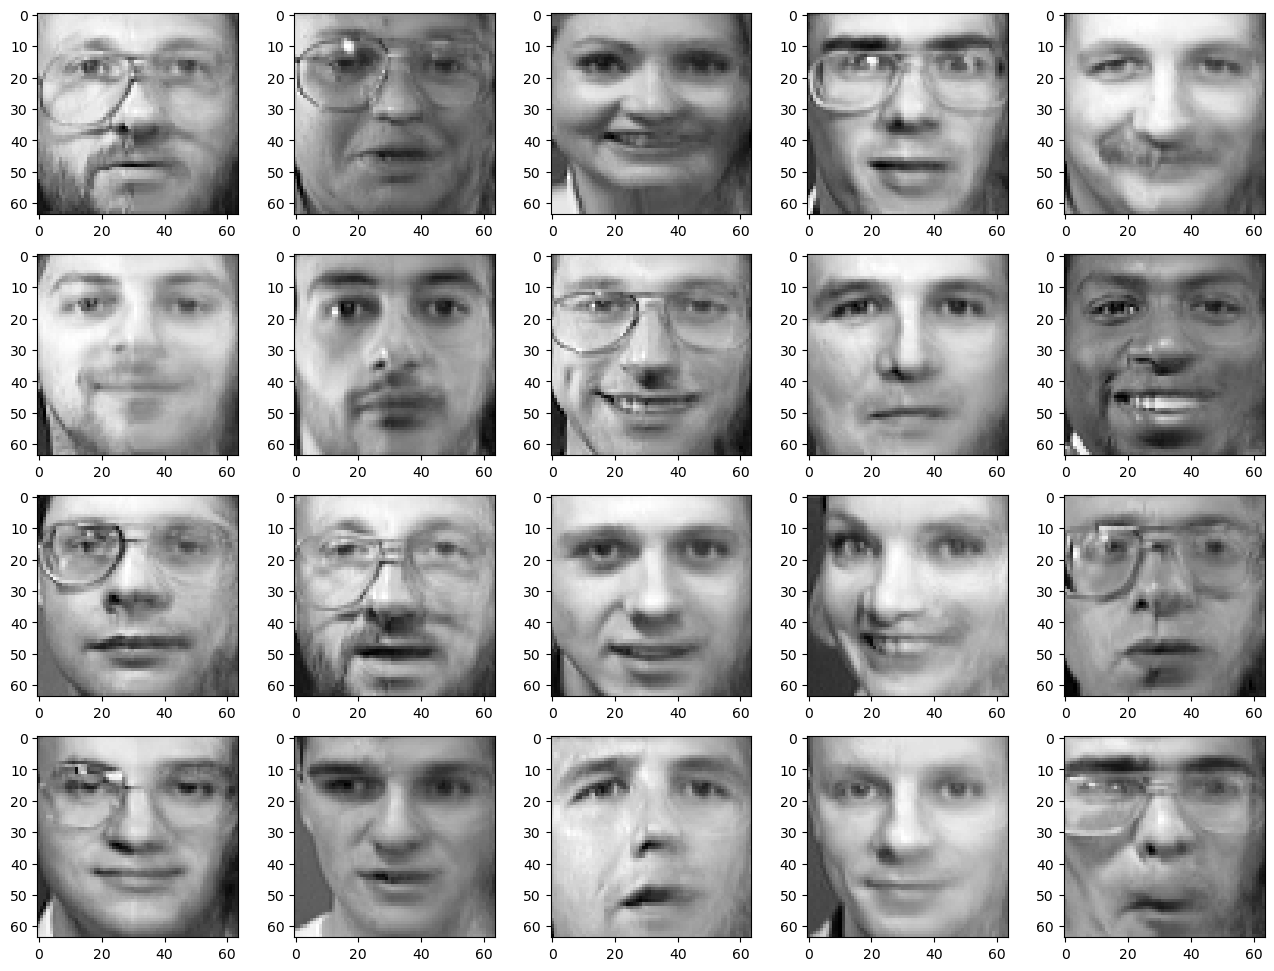

In [87]:
pics = glue(X_test, lasso.predict(X_test)) # reconstruct and glue together X and predicted Y for the test dataset

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

In [92]:
from sklearn.model_selection import LeaveOneOut
from tqdm.notebook import tqdm

In [94]:
alpha = 0.5 
loo = LeaveOneOut()

loss_values = []

for train_ids, val_ids in tqdm(loo.split(X_train), total=loo.get_n_splits(X_train)):
    curr_X_train = X_train[train_ids]
    curr_y_train = y_train[train_ids]
    
    curr_X_val = X_train[val_ids]
    curr_y_val = y_train[val_ids]
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(curr_X_train, curr_y_train)
    
    y_pred = ridge.predict(curr_X_val)
    curr_loss = mean_squared_error(curr_y_val, y_pred)
    
    loss_values.append(curr_loss)

loss_values = np.array(loss_values)

  0%|          | 0/380 [00:00<?, ?it/s]

In [97]:
loss_values.mean()

0.0098063415

In [98]:
from sklearn.model_selection import KFold

In [99]:
kf = KFold(n_splits=5)

In [100]:
def try_alpha(alpha):
    loss_values = []

    for train_ids, val_ids in kf.split(X_train):
        curr_X_train = X_train[train_ids]
        curr_y_train = y_train[train_ids]

        curr_X_val = X_train[val_ids]
        curr_y_val = y_train[val_ids]

        ridge = Ridge(alpha=alpha)
        ridge.fit(curr_X_train, curr_y_train)

        y_pred = ridge.predict(curr_X_val)
        curr_loss = mean_squared_error(curr_y_val, y_pred)

        loss_values.append(curr_loss)

    loss_values = np.array(loss_values)
    return loss_values.mean()

In [101]:
alpha_list = np.exp(np.linspace(-7, 5, 100))

In [103]:
results = []

for alpha in tqdm(alpha_list):
    loss = try_alpha(alpha)
    results.append((loss, alpha))

  0%|          | 0/100 [00:00<?, ?it/s]

In [104]:
results = np.array(results)
results[np.argmin(results[:, 0])]

array([0.00823911, 8.09226843])

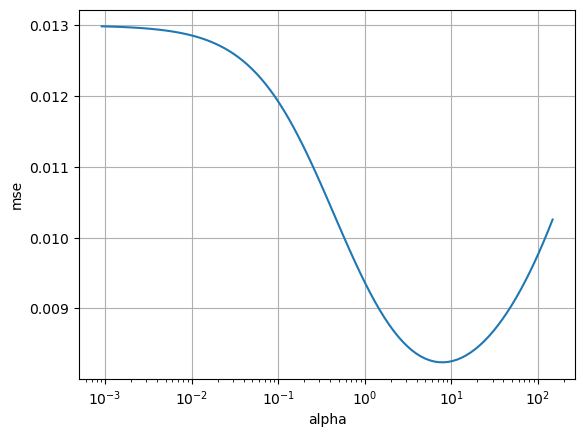

In [105]:
plt.plot(results[:, 1], results[:, 0])
plt.xscale('log')

plt.xlabel('alpha')
plt.ylabel('mse')

plt.grid()

In [106]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameter_dict = {
    "alpha" : np.exp(np.linspace(-7, 5, 100))
}

gscv = GridSearchCV(estimator=Ridge(), param_grid=parameter_dict,
                  scoring='neg_mean_squared_error',
                  cv=5)

In [124]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([9.11881966e-04, 1.02939104e-03, 1.16204284e-03, 1.31178872e-03,
       1.48083151e-03, 1.67165789e-03, 1.88707499e-03, 2.13025167e-03,
       2.40476515e-03, 2.71465363e-03, 3.06447569e-03, 3.45937734e-03,
       3.90516772e-03, 4.40840460e-03, 4.97649076e-03, 5.61778297e-03,
       6.34171488e-03, 7.15893581e-03, 8.08146737e-03, 9....
       9.13507328e+00, 1.03122585e+01, 1.16411409e+01, 1.31412689e+01,
       1.48347099e+01, 1.67463750e+01, 1.89043856e+01, 2.13404869e+01,
       2.40905147e+01, 2.71949230e+01, 3.06993789e+01, 3.46554342e+01,
       3.91212840e+01, 4.41626226e+01, 4.98536099e+01, 5.62779626e+01,
       6.35301853e+01, 7.17169609e+01, 8.09587199e+01, 9.13914122e+01,
       1.03168506e+02, 1.16463248e+02, 1.31471208e+02, 1.48413159e+02])},
             scoring='neg_mean_squared_error')

In [125]:
gscv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [126]:
gscv.best_params_

{'alpha': 8.092268429068358}

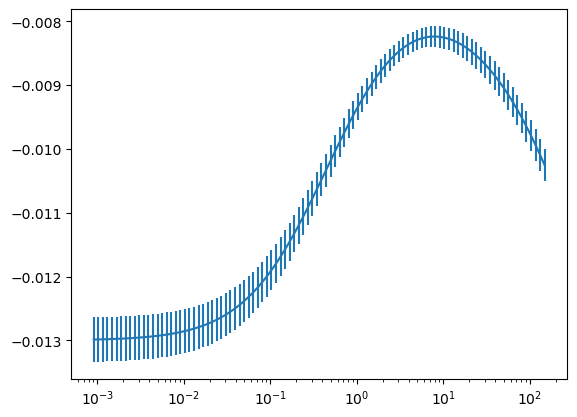

In [127]:
plt.errorbar(x=parameter_dict['alpha'],
            y=gscv.cv_results_['mean_test_score'],
            yerr=gscv.cv_results_['std_test_score'] / gscv.cv**0.5)
plt.xscale('log')